<a href="https://colab.research.google.com/github/Juan-Edwards/retail-sales-analysis/blob/proye_1_p4/proyect1(core)_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#descarga el nuevo csv con los datos limpios del proyecto 3 para continuar
df=pd.read_csv("data_clean.csv")
df

In [16]:
df=df.drop("Unnamed: 0",axis=1)

In [ ]:
df

In [17]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Normalized_mtot,Desviacion
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,500.500000,41.39200,2.514000,179.890000,456.000000,7.105427e-18,2.910383e-14
std,288.819436,13.68143,1.132734,189.681356,559.997632,1.000000e+00,5.599081e+02
min,1.000000,18.00000,1.000000,25.000000,25.000000,-7.696461e-01,-4.424756e+02
25%,250.750000,29.00000,1.000000,30.000000,60.000000,-7.071458e-01,-3.924756e+02
50%,500.500000,42.00000,3.000000,50.000000,135.000000,-5.732167e-01,-3.203617e+02
75%,750.250000,53.00000,4.000000,300.000000,900.000000,7.928605e-01,4.325244e+02
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2.757155e+00,1.556752e+03


 Variables númericas: Age, Quantity, Price per Unit, Total Amount


Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.


Histograma y boxplot de edad

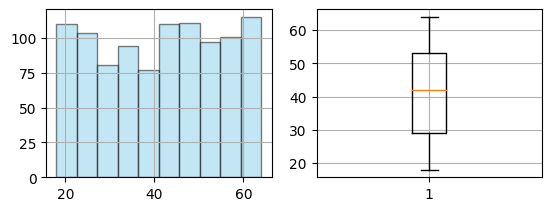

In [63]:
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(2,2,1)
ax1.hist(df["Age"], 10, color="skyblue", edgecolor="black",alpha=0.5, density= False)
ax1.grid()
ax2= fig.add_subplot(2,2,2)
ax2.boxplot(df["Age"])
ax2.grid()

La distribucion de edades segun el histograma aparenta ser uniforme entre 18 y 60. En el boxplot no se ve la presencia de ningun outlier y expone como si hay algo de variabilidad en los datos

Histograma y boxplot de cantidades

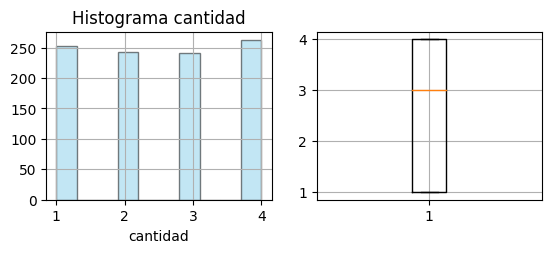

In [58]:
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(2,2,1)
ax1.hist(df["Quantity"], 10, density=False, color="skyblue", edgecolor="black",alpha=0.5)
ax1.set_title("Histograma cantidad")
ax1.grid()
ax1.set_xlabel("cantidad")
ax2= fig.add_subplot(2,2,2)
ax2.boxplot(df["Quantity"])
ax2.grid()

El histograma muestra que hay una distribucion uniforme en las cantidades de ventas entre 1 y 4, se dan casi de igual frecuencia las distintas cantidades de ventas. El boxplot muestra como no hay casi variabilidad en los datos y reafirma que hay una distribucion uniforme en los datos.

Histograma y boxplot de precio por unidad

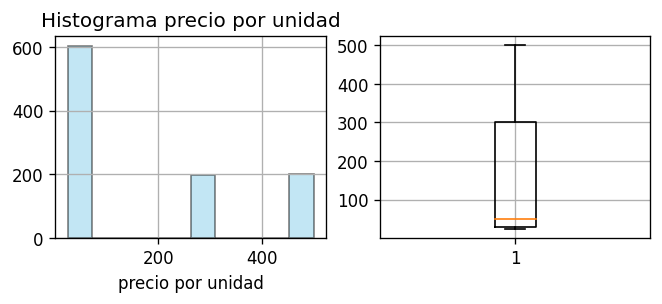

In [60]:
fig = plt.figure(dpi=120)
ax1 = fig.add_subplot(2,2,1)
ax1.hist(df["Price per Unit"], 10, density=False, color="skyblue", edgecolor="black",alpha=0.5)
ax1.set_title("Histograma precio por unidad")
ax1.grid()
ax1.set_xlabel("precio por unidad")
ax2= fig.add_subplot(2,2,2)
ax2.boxplot(df["Price per Unit"])
ax2.grid()

El histograma muestra una distribucion sesgada a la derecha. El boxplot no expone ningun outlier y muestra como hay valores bastante mas altos que la mediana lo que expone denuevo el sesgo

Histograma y boxplot de monto total

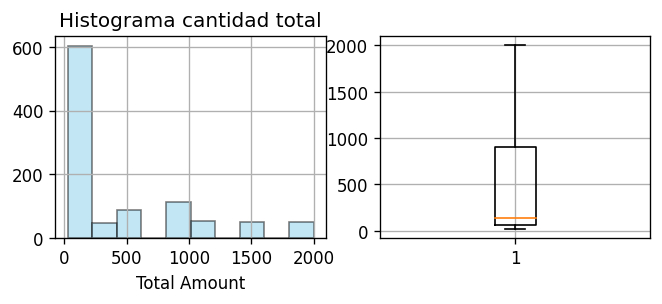

In [61]:

fig = plt.figure(dpi=120)
ax1 = fig.add_subplot(2,2,1)
ax1.hist(df["Total Amount"], 10, density=False, color="skyblue", edgecolor="black",alpha=0.5)
ax1.set_title("Histograma cantidad total")
ax1.grid()
ax1.set_xlabel("Total Amount")
ax2= fig.add_subplot(2,2,2)
ax2.boxplot(df["Total Amount"])
ax2.grid()

La distribuciones asimetrica y esta sesgada a la derecha. En el box plot se ve que no hay valores atipicos. Hay una esta asimetria significa que hay pocos valores que son mucho mas grandes que el resto, por eso en el boxplot se ve como la mediana esta casi al principio de la caja.

#Grafico de linea tendencia de ventas

In [ ]:
#pregunta como tratar este grafico

In [76]:
df["Date"]=pd.to_datetime(df["Date"])

In [156]:
#Para poder hacer un grafico entendible cree una cuenta
df["Mes_Año"]=df["Date"].dt.strftime("%m-%Y")
#al realizar el grafico me di cuenta que debia ordenar las transacciones por fechas
df=df.sort_values(by=["Date"])
df["Mes_Año"]=pd.to_datetime(df["Mes_Año"])
data=df.groupby("Mes_Año")["Total Amount"].sum()
data

<ipython-input-156-7950e052eb7a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Mes_Año"]=pd.to_datetime(df["Mes_Año"])


,Total Amount
Mes_Año,
2023-01-01,35450
2023-02-01,44060
2023-03-01,28990
2023-04-01,33870
2023-05-01,53150
2023-06-01,36715
2023-07-01,35465
2023-08-01,36960
2023-09-01,23620


(array([19358., 19417., 19478., 19539., 19601., 19662., 19723.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

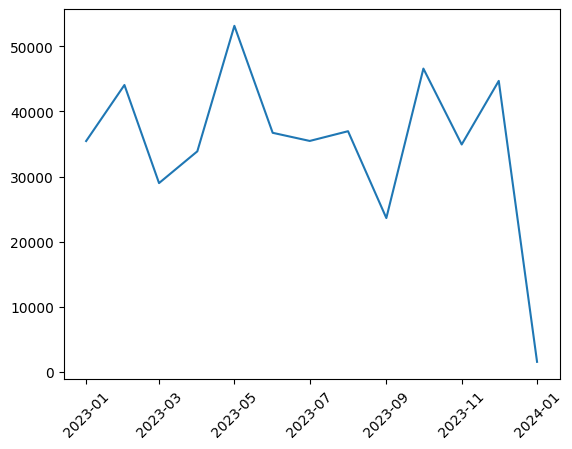

In [155]:
#Los datos que usare para el grafico son la suma de ventas de cada mez de cada año
plt.plot(data)
plt.xticks(rotation=45)
#para que se vean mejor los nombres del eje x utilize

In [ ]:
# En el grafico se nota que hay una tendencia a la caida en las ventas en la actualidad
#Esto se debe a que hay pocos datos del mes de enero del 2024 asique aún no se completaron las
#ventas mensuales del mismo.
#Para analizar mejor uno podria ver los datos solamente hasta diciembre de 2023

#Grafico de dispersion entre distintas variables

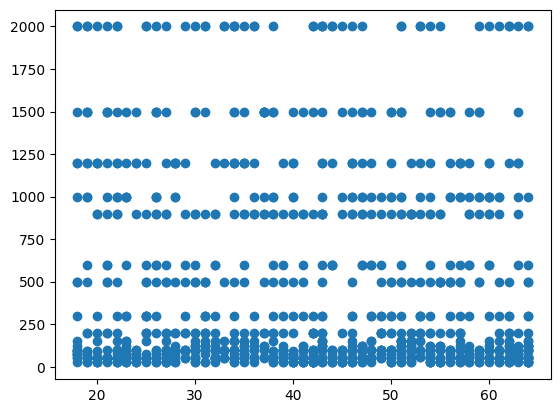

In [157]:
#Grafico entre edad y monto total
plt.scatter(df["Age"],df["Total Amount"])

In [ ]:
# no se ve ninguna realcion entre las variables, son independientes

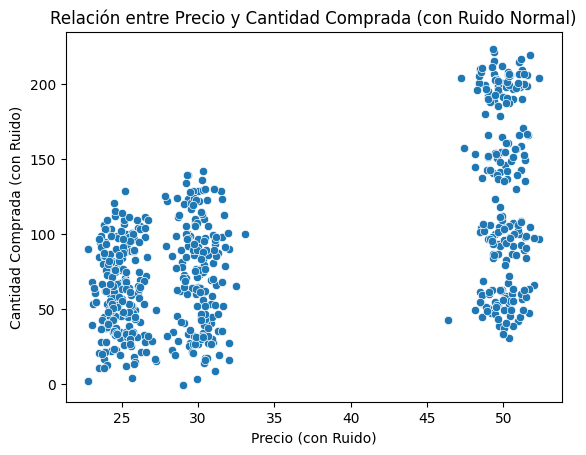

In [173]:
#grafico de dispersion entre precio unitario y monto total
#se vio la relacion con los precios menores a 100 para un analisis mas detallado
df_100=df[df["Price per Unit"]<100]
normal_distributed_price = np.random.normal(loc=0, scale=1, size=len(df_100))
normal_distributed_quantity = np.random.normal(loc=0, scale=10, size=len(df_100))
# Graficar la relación entre precio unitario y monto total con el nuevo ruido

sns.scatterplot(x=df_100["Price per Unit"] + normal_distributed_price,
                y=df_100["Total Amount"] + normal_distributed_quantity)
plt.title('Relación entre Precio y Monto total (con Ruido Normal)')
plt.xlabel('Precio (con Ruido)')
plt.ylabel('Cantidad Comprada (con Ruido)')
plt.show()

In [ ]:
#en unidades mas pequeñas de precio se ve una menor variabilidad en el monto, pero
#con precios mas altos se ve una variabilidad mas alta en el monto total
#tambien presentan un asociacion positiva
#gracias a la suma de la distribucion normal hay mas evidencia de que la varianza va creciendo